In [1]:
import pylab as pl
import numpy as np
from astropy.visualization import quantity_support
from astropy import units as u
from astropy import wcs

# set so that these display properly on black backgrounds
pl.rcParams['figure.facecolor']='w'

from spectral_cube import SpectralCube

from pvextractor import extract_pv_slice, Path

In [2]:
cube = SpectralCube.read('http://www.astropy.org/astropy-data/l1448/l1448_13co.fits')
cube

SpectralCube with shape=(53, 105, 105):
 n_x:    105  type_x: RA---SFL  unit_x: deg    range:    50.924417 deg:   51.740103 deg
 n_y:    105  type_y: DEC--SFL  unit_y: deg    range:    30.301945 deg:   30.966389 deg
 n_s:     53  type_s: VOPT      unit_s: m / s  range:     2528.195 m / s:    5982.223 m / s

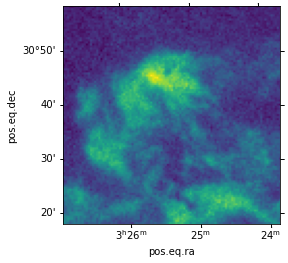

In [3]:
ax = pl.subplot(111, projection=cube.wcs.celestial)
ax.imshow(cube[25].value)

In [4]:
import regions
from astropy.coordinates import SkyCoord

In [18]:
cen1 = SkyCoord('3h25m30s', '30d35m15s', frame='fk5', unit=(u.h, u.deg))
cen2 = SkyCoord('3h25m30s', '30d41m20s', frame='fk5', unit=(u.h, u.deg))

In [19]:
reg1 = regions.CircleSkyRegion(center=cen1, radius=10*u.arcmin)
reg2 = regions.CircleSkyRegion(center=cen2, radius=5*u.arcmin)

<WCSAxesSubplot:>

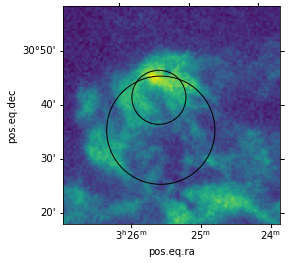

In [20]:
ax = pl.subplot(111, projection=cube.wcs.celestial)
ax.imshow(cube[25].value)
reg1.to_pixel(cube.wcs.celestial).plot(ax=ax)
reg2.to_pixel(cube.wcs.celestial).plot(ax=ax)

Unfortunately, `regions` does not have the "and not" boolean operator (see https://astropy-regions.readthedocs.io/en/stable/compound.html), but we can reconstruct it by taking the intersection of `reg1` with the symmetric difference (exclusive or) of the pair of regions:

In [56]:
composite = reg1 & (reg1 ^ reg2)

In [57]:
# equivalently:
composite = reg1.intersection(reg1.symmetric_difference(reg2))

In [58]:
comp_pixel = composite.to_pixel(cube.wcs.celestial)

In [59]:
msk = comp_pixel.to_mask()

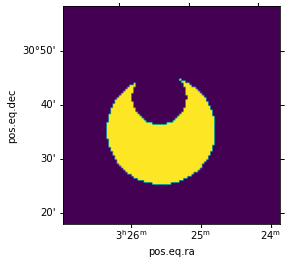

In [60]:
ax = pl.subplot(111, projection=cube.wcs.celestial)
#ax.imshow(cube[25].value)
pl.imshow(msk.to_image(cube.shape[1:]))

In [61]:
mcube = cube.with_mask(msk.to_image(cube.shape[1:]).astype('bool'))

<WCSAxesSubplot:>

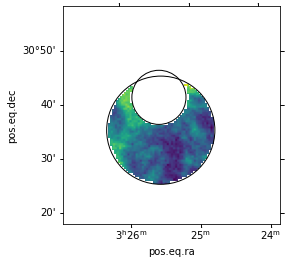

In [62]:
ax = pl.subplot(111, projection=cube.wcs.celestial)
ax.imshow(mcube[25].value)
reg1.to_pixel(cube.wcs.celestial).plot(ax=ax)
reg2.to_pixel(cube.wcs.celestial).plot(ax=ax)